# Process files from instaloader

# Compressed json

In [1]:
import os, json
import pandas as pd
import lzma
import re
import seaborn as sns

In [2]:
# walk through directory with json files
l = []
for dirpath, dirnames, filenames in os.walk("path"):
    for filename in filenames:
        if filename.endswith(".json.xz"):
            txtfilepath = (dirpath + filename.split(".")[0]+".txt")
            with lzma.open(dirpath+filename, 'rb') as xz_file:
                for line in xz_file:
                    # Decompress the XZ data line by line and parse it as JSON
                    decompressed_data = line.decode('utf-8')
                    json_data = json.loads(decompressed_data)
                    
            # load post text 
            try:
                with open(txtfilepath, 'r') as file:
                    file_contents = file.read()
                    # add to df
                    json_data["node"]['text']=str(file_contents)
            except FileNotFoundError:
                print(filename)
                json_data["node"]['text']= float('nan')
            l.append(json_data["node"])
                              


2019-03-24_21-08-23_UTC.json.xz
2019-06-06_10-45-24_UTC.json.xz
2018-03-23_22-30-11_UTC.json.xz
2019-10-10_13-46-14_UTC.json.xz
2018-06-11_20-39-38_UTC.json.xz
2017-09-22_08-50-29_UTC.json.xz
2021-07-26_14-08-34_UTC.json.xz
2018-01-09_09-33-51_UTC.json.xz
2020-09-14_20-41-57_UTC.json.xz
2018-03-21_19-22-36_UTC.json.xz
2023-04-19_12-44-55_UTC.json.xz
2019-02-25_19-39-34_UTC.json.xz
2014-09-04_16-46-30_UTC.json.xz
2016-10-08_00-56-26_UTC.json.xz
2018-06-11_20-43-56_UTC.json.xz
2018-03-17_17-27-26_UTC.json.xz
2023-09-18_17-45-25_UTC.json.xz
2017-09-03_22-51-41_UTC.json.xz
2014-08-23_18-21-17_UTC.json.xz
2021-07-26_17-06-33_UTC.json.xz
2018-03-17_17-11-32_UTC.json.xz
2023-09-19_11-03-41_UTC.json.xz
2022-07-14_13-33-50_UTC.json.xz
2022-09-10_16-31-48_UTC.json.xz
2023-03-07_12-37-43_UTC.json.xz
2022-07-14_13-35-02_UTC.json.xz
2021-03-08_20-40-06_UTC.json.xz
2017-12-08_13-30-28_UTC.json.xz
2014-11-09_09-59-25_UTC.json.xz
2021-10-10_23-55-47_UTC.json.xz
2022-01-23_15-07-02_UTC.json.xz
2023-09-

In [42]:
# create df
df = pd.DataFrame(l)

# fix the date collumn
df["taken_at_timestamp"] = pd.to_datetime(df["taken_at_timestamp"], unit='s')

In [43]:
print(f'''N posts: {df.shape[0]}
earliest date: {df["taken_at_timestamp"].min()}
latest date: {df["taken_at_timestamp"].max()}''')

N posts: 17013
earliest date: 2011-06-04 16:05:36
latest date: 2023-09-28 19:40:33


In [44]:
[i for i in df.columns]

['comments_disabled',
 '__typename',
 'id',
 'edge_media_to_caption',
 'shortcode',
 'edge_media_to_comment',
 'taken_at_timestamp',
 'dimensions',
 'display_url',
 'edge_liked_by',
 'edge_media_preview_like',
 'owner',
 'thumbnail_src',
 'thumbnail_resources',
 'is_video',
 'accessibility_caption',
 'text',
 'product_type',
 'video_view_count',
 'gating_info',
 'fact_check_overall_rating',
 'fact_check_information',
 'media_preview',
 'display_resources',
 'tracking_token',
 'edge_media_to_tagged_user',
 'caption_is_edited',
 'has_ranked_comments',
 'commenting_disabled_for_viewer',
 'edge_media_to_sponsor_user',
 'location',
 'viewer_has_liked',
 'viewer_has_saved',
 'viewer_has_saved_to_collection',
 'viewer_in_photo_of_you',
 'viewer_can_reshare',
 'is_ad',
 'edge_web_media_to_related_media',
 'edge_sidecar_to_children',
 'iphone_struct']

In [45]:
# take only important columns
#df = df[['id','taken_at_timestamp','text']]

In [47]:
df.head(2)

,comments_disabled,__typename,id,edge_media_to_caption,shortcode,edge_media_to_comment,taken_at_timestamp,dimensions,display_url,edge_liked_by,...,location,viewer_has_liked,viewer_has_saved,viewer_has_saved_to_collection,viewer_in_photo_of_you,viewer_can_reshare,is_ad,edge_web_media_to_related_media,edge_sidecar_to_children,iphone_struct
0,False,GraphImage,2692215513821528736,{'edges': [{'node': {'text': 'My backyard 🍁🍂🌾☀...,CVcq77wIMKg,{'count': 2},2021-10-25 10:18:40,"{'height': 1350, 'width': 1080}",https://scontent-cph2-1.cdninstagram.com/v/t51...,{'count': 39},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,GraphImage,905840873729471107,{'edges': [{'node': {'text': '#amagerfælled #a...,ySMXmtrLKD,{'count': 0},2015-01-25 16:51:08,"{'height': 640, 'width': 640}",https://scontent-cph2-1.cdninstagram.com/v/t51...,{'count': 4},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Specify the custom directory path
custom_directory = '/Users/troelsdreesen/Desktop/#amagerfælled'

# Save the DataFrame to a CSV file in the custom directory
df.to_csv(os.path.join(custom_directory, 'amagerfælled_uden_billeder.csv'), index=False)


# Visualization of the whole dataset

In [50]:
# extract days/weeks/months from dateformat to make meaningful groupby operations possible
df["day"] = (df['taken_at_timestamp']).dt.floor('d').rename_axis('day')
df["month"] = (df['taken_at_timestamp']).dt.floor("30D").rename_axis('month')

/var/folders/mc/t6_7j5gn6_3bl2mn8fgs8ggm0000gn/T/ipykernel_952/2888950208.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plt= sns.histplot(
/var/folders/mc/t6_7j5gn6_3bl2mn8fgs8ggm0000gn/T/ipykernel_952/2888950208.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(), rotation=30, size=40)
/var/folders/mc/t6_7j5gn6_3bl2mn8fgs8ggm0000gn/T/ipykernel_952/2888950208.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_yticklabels(plt.get_yticklabels(), size=40)


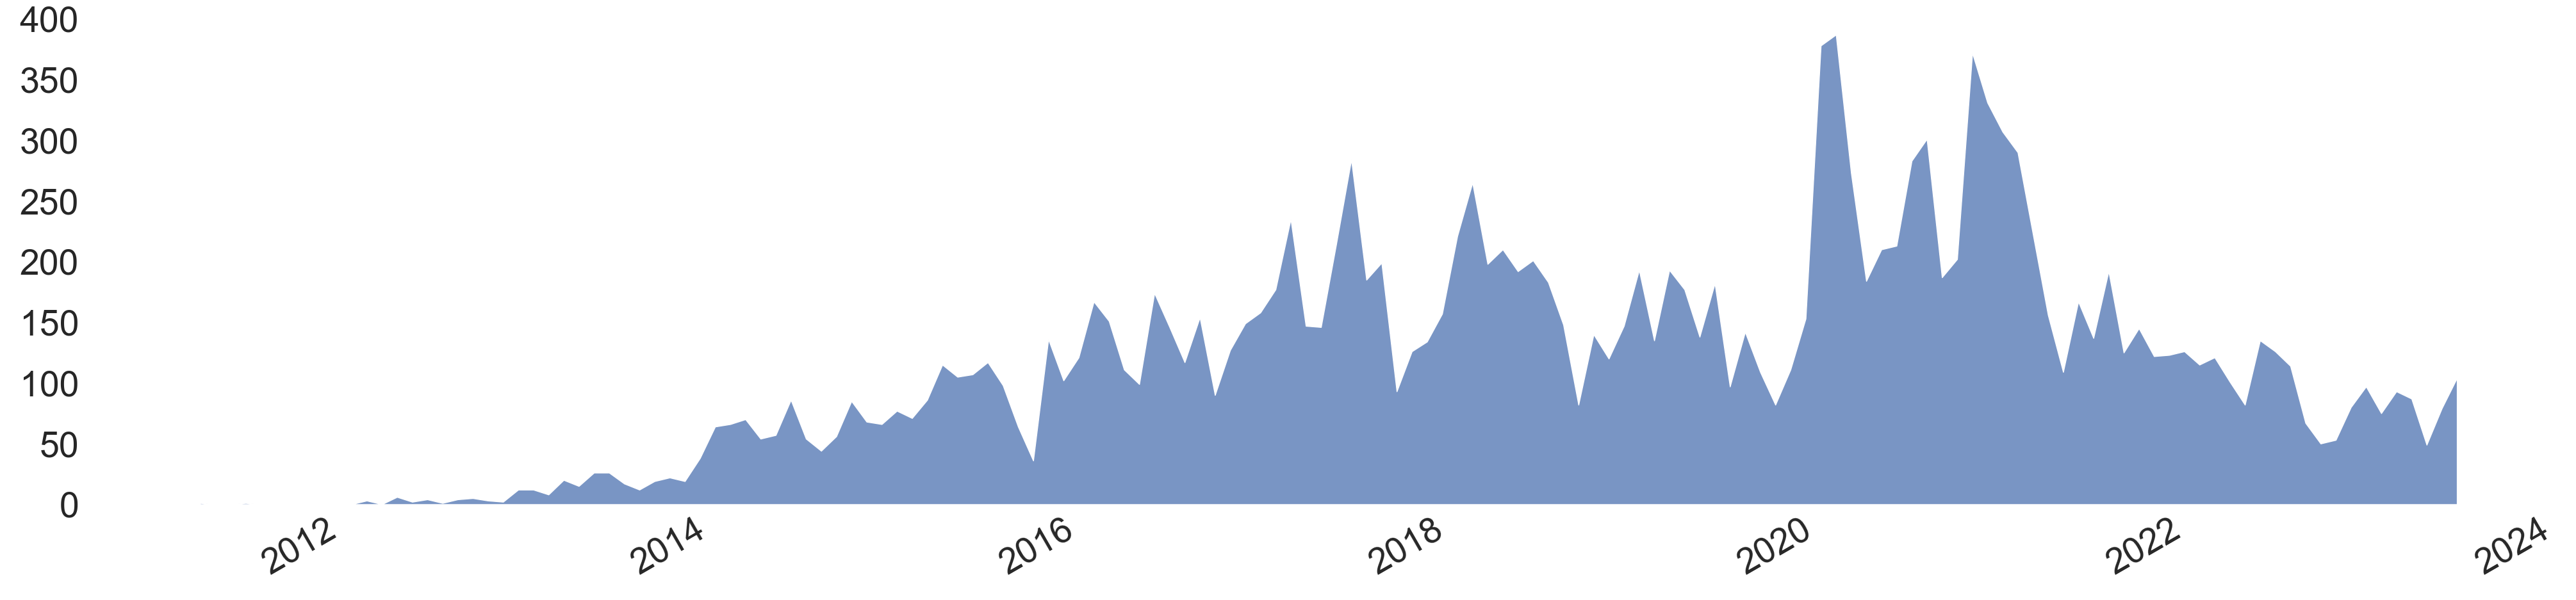

In [51]:
# plot data over time - here grouped by group ID 
sns.set(rc={'figure.figsize':(50,10)})
sns.set_theme(style="white")
plt= sns.histplot(
    data=df, 
    x= "day",
    bins=150,
    #hue="group_id",
    element="poly", 
    multiple="stack",
    palette = "Paired",
    )
plt.legend([],[], frameon=False)
plt.set_xticklabels(plt.get_xticklabels(), rotation=30, size=40)
plt.set_yticklabels(plt.get_yticklabels(), size=40)
plt.set(xlabel=' ', ylabel=' ')


#plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#sns.move_legend(plt, "center right")
#plt.legend(loc='upper left')
sns.despine(left=True, bottom=True)
#fig = plt.get_figure()
#fig.savefig("out.svg", dpi = 300) 

# Hashtags

In [10]:
df['text'] = df['text'].astype(str)

# Function to extract hashtags from a text
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return hashtags

# Apply the function to the 'TextColumn' and create a new 'Hashtags' column
df['hashtags'] = df['text'].apply(extract_hashtags)

df.head()

,comments_disabled,__typename,id,edge_media_to_caption,shortcode,edge_media_to_comment,taken_at_timestamp,dimensions,display_url,edge_liked_by,...,viewer_can_reshare,is_ad,edge_web_media_to_related_media,edge_sidecar_to_children,product_type,video_view_count,iphone_struct,day,month,hashtags
0,False,GraphImage,3143125229789995339,{'edges': [{'node': {'text': '• Det kan godt v...,Cuen75WM2FL,{'count': 2},2023-07-09 13:35:47,"{'height': 1350, 'width': 1080}",https://scontent-arn2-1.cdninstagram.com/v/t51...,{'count': 124},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-09,2023-06-22,"[#amager, #amagerfælled, #running, #run, #løb,..."
1,False,GraphImage,3126865882440589200,{'edges': [{'node': {'text': 'I dag sprang jeg...,Ctk2_QHKN-Q,{'count': 1},2023-06-17 03:11:22,"{'height': 1350, 'width': 1080}",https://scontent-arn2-1.cdninstagram.com/v/t51...,{'count': 2},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-17,2023-05-23,"[#tidligmorgenstemning, #morgenrutine, #øgetpr..."
2,False,GraphSidecar,2920023701559943232,{'edges': [{'node': {'text': '27 km med sol i ...,CiGAhXrM6BA,"{'count': 3, 'page_info': {'has_next_page': Tr...",2022-09-04 17:52:52,"{'height': 1350, 'width': 1080}",https://scontent-arn2-1.cdninstagram.com/v/t51...,{'count': 28},...,True,False,{'edges': []},{'edges': [{'node': {'__typename': 'GraphImage...,NaN,NaN,NaN,2022-09-04,2022-08-26,"[#amarminoen, #weekend, #amager, #amarminoen, ..."
3,False,GraphImage,2950469903434695838,{'edges': [{'node': {'text': 'Last week I fell...,CjyLL6ytMSe,{'count': 3},2022-10-16 18:04:02,"{'height': 1349, 'width': 1080}",https://scontent-arn2-1.cdninstagram.com/v/t51...,{'count': 88},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-16,2022-09-25,"[#breathe, #notice, #yinYoga, #meditation, #tr..."
4,False,GraphImage,3033736273391076542,"{'edges': [{'node': {'text': ""Don't you love t...",CoZ_xE1sUS-,{'count': 1},2023-02-08 15:19:27,"{'height': 1080, 'width': 1080}",https://scontent-arn2-1.cdninstagram.com/v/t51...,{'count': 16},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-08,2023-01-23,"[#ørestad, #copenhagen, #oerestad, #sun, #natu..."


# Visualization

In [11]:
# extract days/weeks/months from dateformat to make meaningful groupby operations possible
df["day"] = (df['taken_at_timestamp']).dt.floor('d').rename_axis('day')
df["month"] = (df['taken_at_timestamp']).dt.floor("30D").rename_axis('month')

/var/folders/mc/t6_7j5gn6_3bl2mn8fgs8ggm0000gn/T/ipykernel_952/2888950208.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plt= sns.histplot(
/var/folders/mc/t6_7j5gn6_3bl2mn8fgs8ggm0000gn/T/ipykernel_952/2888950208.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(), rotation=30, size=40)
/var/folders/mc/t6_7j5gn6_3bl2mn8fgs8ggm0000gn/T/ipykernel_952/2888950208.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_yticklabels(plt.get_yticklabels(), size=40)


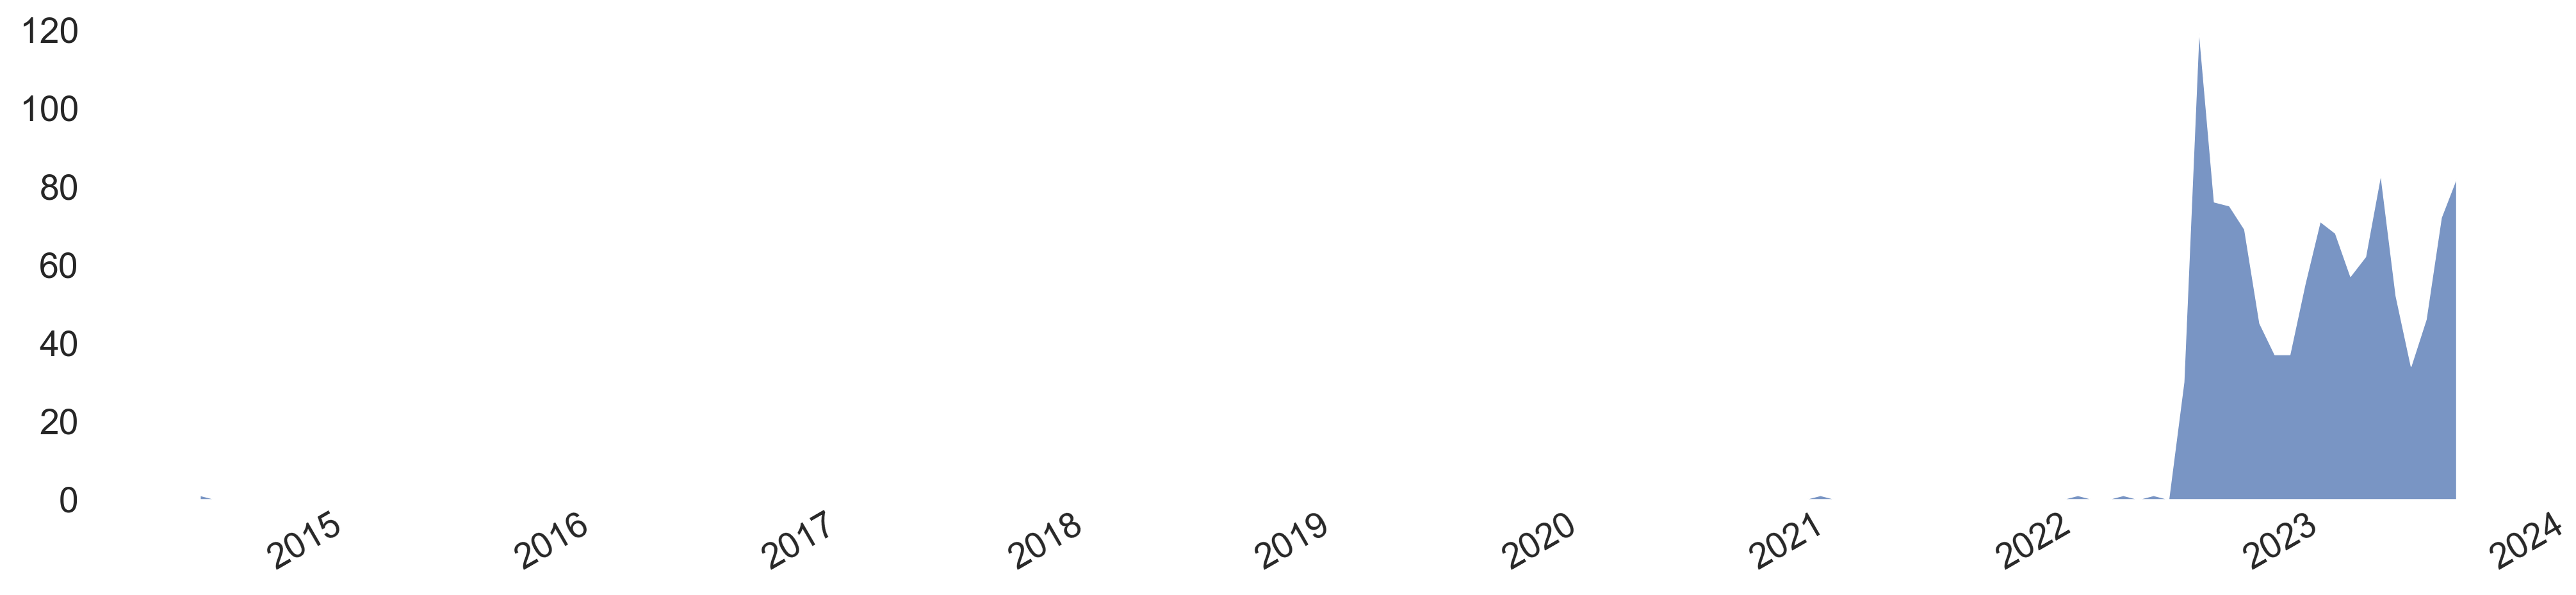

In [12]:
# plot data over time - here grouped by group ID 
sns.set(rc={'figure.figsize':(50,10)})
sns.set_theme(style="white")
plt= sns.histplot(
    data=df, 
    x= "day",
    bins=150,
    #hue="group_id",
    element="poly", 
    multiple="stack",
    palette = "Paired",
    )
plt.legend([],[], frameon=False)
plt.set_xticklabels(plt.get_xticklabels(), rotation=30, size=40)
plt.set_yticklabels(plt.get_yticklabels(), size=40)
plt.set(xlabel=' ', ylabel=' ')


#plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#sns.move_legend(plt, "center right")
#plt.legend(loc='upper left')
sns.despine(left=True, bottom=True)
#fig = plt.get_figure()
#fig.savefig("out.svg", dpi = 300) 